In [1]:
import pandas as pd 
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import warnings

with warnings.catch_warnings():
    warnings.simplefilter("ignore")





In [2]:
df = pd.read_csv("E:\Book1.csv")
df.head(20)

,x,y,color
0,8,2,0
1,2,4,0
2,6,6,0
3,3,2,1
4,3,6,0
5,1,1,0
6,5,8,0
7,4,4,1
8,9,7,0
9,7,5,1


In [3]:
train, test = train_test_split(
    df, test_size=0.2, random_state=42, shuffle=True)

In [4]:
x = np.column_stack((train.x.values, train.y.values)) 
y = train.color.values

In [5]:
model = keras.Sequential([
    keras.layers.Dense(4, input_shape=(2,), activation='relu'),
    keras.layers.Dense(2, activation='sigmoid')
])
 
model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])
 
model.fit(x, y, epochs=10, batch_size=8)

Epoch 1/10
72/72 [==============================] - 1s 1ms/step - loss: 0.7128 - accuracy: 0.5140
Epoch 2/10
72/72 [==============================] - 0s 2ms/step - loss: 0.7025 - accuracy: 0.5192
Epoch 3/10
72/72 [==============================] - 0s 2ms/step - loss: 0.7000 - accuracy: 0.5210
Epoch 4/10
72/72 [==============================] - 0s 2ms/step - loss: 0.6991 - accuracy: 0.5175
Epoch 5/10
72/72 [==============================] - 0s 2ms/step - loss: 0.6961 - accuracy: 0.5245
Epoch 6/10
72/72 [==============================] - 0s 2ms/step - loss: 0.6961 - accuracy: 0.5227
Epoch 7/10
72/72 [==============================] - 0s 2ms/step - loss: 0.6944 - accuracy: 0.5192
Epoch 8/10
72/72 [==============================] - 0s 2ms/step - loss: 0.6944 - accuracy: 0.5017
Epoch 9/10
72/72 [==============================] - 0s 2ms/step - loss: 0.6927 - accuracy: 0.5315
Epoch 10/10
72/72 [==============================] - 0s 2ms/step - loss: 0.6925 - accuracy: 0.5210


In [6]:
x = np.column_stack((test.x.values, test.y.values))
y = test.color.values
model.evaluate(x, y, batch_size=8)

18/18 [==============================] - 0s 2ms/step - loss: 0.6864 - accuracy: 0.5524


[0.6864328980445862, 0.5524475574493408]

In [7]:
model_better = keras.Sequential([
    keras.layers.Dense(16, input_shape=(2,), activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(2, activation='softmax')
])
 
model_better.compile(optimizer='adam',
                     loss=keras.losses.SparseCategoricalCrossentropy(),
                     metrics=['accuracy'])
 
x = np.column_stack((train.x.values, train.y.values))
y = train.color.values
 
model_better.fit(x, y, epochs=10, batch_size=8)

Epoch 1/10
72/72 [==============================] - 1s 2ms/step - loss: 0.6987 - accuracy: 0.5035
Epoch 2/10
72/72 [==============================] - 0s 2ms/step - loss: 0.6956 - accuracy: 0.4965
Epoch 3/10
72/72 [==============================] - 0s 2ms/step - loss: 0.6943 - accuracy: 0.5227
Epoch 4/10
72/72 [==============================] - 0s 2ms/step - loss: 0.6963 - accuracy: 0.4930
Epoch 5/10
72/72 [==============================] - 0s 2ms/step - loss: 0.6961 - accuracy: 0.5000
Epoch 6/10
72/72 [==============================] - 0s 2ms/step - loss: 0.6952 - accuracy: 0.5017
Epoch 7/10
72/72 [==============================] - 0s 2ms/step - loss: 0.6921 - accuracy: 0.5140
Epoch 8/10
72/72 [==============================] - 0s 2ms/step - loss: 0.6933 - accuracy: 0.5297
Epoch 9/10
72/72 [==============================] - 0s 2ms/step - loss: 0.6924 - accuracy: 0.5175
Epoch 10/10
72/72 [==============================] - 0s 2ms/step - loss: 0.6930 - accuracy: 0.5122


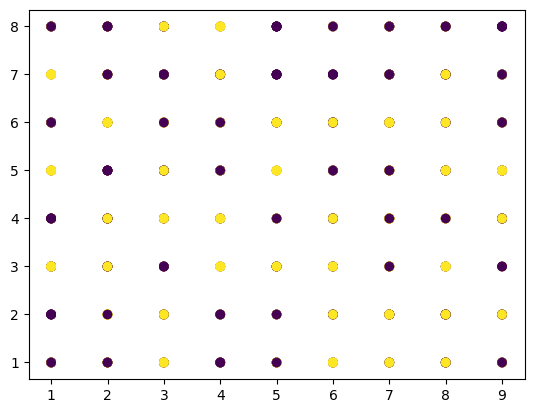

In [8]:
plt.scatter(df['x'], df['y'], c=df['color'])
plt.show()


C:\Python311\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Python311\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


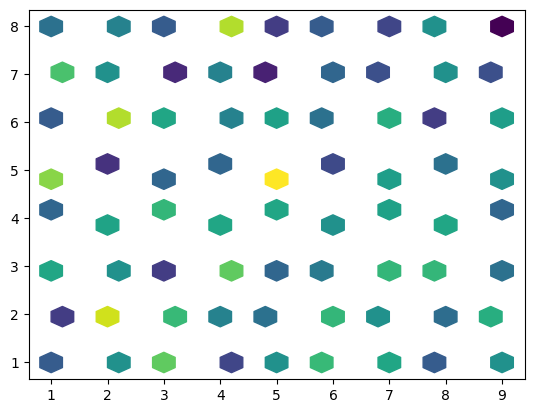

In [9]:
plt.hexbin(df['x'], df['y'], gridsize=20, C=df['color'], cmap='viridis')
plt.show()


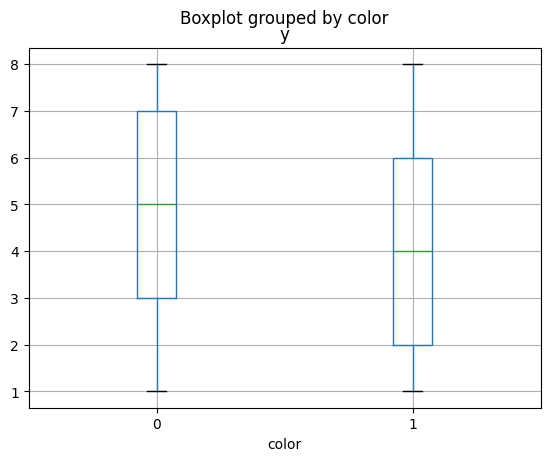

In [10]:
df.boxplot(column='y', by='color')
plt.show()
